In [63]:
import pandas as pd
import numpy as np
# import xgboost as xgb
from sklearn import preprocessing, neighbors, svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, \
  RandomForestRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV

from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

import itertools
from itertools import cycle

import pickle
DIR_DATA = "data"
DIR_PROCESSED = "processed"
LABEL = "rating"
NON_PREDICTORS = [LABEL]#, "name","anime_id"]
CV_FOLDS = 5

In [2]:
# HR_comma_sep.csv

# Employee satisfaction level
# Last evaluation
# Number of projects
# Average monthly hours
# Time spent at the company
# Whether they have had a work accident
# Whether they have had a promotion in the last 5 years
# Department
# Salary
# Whether the employee has left

In [3]:
hr = pd.read_csv(DIR_DATA + '/HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
print('Percent who left: {:.2f}'.format(np.sum(hr.left) / len(hr.left) * 100))

Percent who left: 23.81


In [32]:
print(list(hr.sales.astype('category').cat.categories))
hr.sales = hr.sales.astype('category').cat.codes
hr.salary = hr.salary.astype('category').cat.codes
# hr.Work_accident = hr.Work_accident.astype('category')
# hr.promotion_last_5years = hr.promotion_last_5years.astype('category')
# hr.left = hr.left.astype('category')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [33]:
# Department metrics don't work

# hr["is_4"] = hr.sales.apply(lambda x: x== 4)

# depProperties = hr.groupby('sales').agg({'promotion_last_5years':np.mean}).values
# hr["avg_per_team"] = hr.sales.apply(lambda x: depProperties[x])

In [34]:
hr.salary.dtype

dtype('int8')

In [35]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,is_4,avg_per_team
0,0.38,0.53,2,157,3,0,1,0,7,1,False,[0.024154589372]
1,0.80,0.86,5,262,6,0,1,0,7,2,False,[0.024154589372]
2,0.11,0.88,7,272,4,0,1,0,7,2,False,[0.024154589372]
3,0.72,0.87,5,223,5,0,1,0,7,1,False,[0.024154589372]
4,0.37,0.52,2,159,3,0,1,0,7,1,False,[0.024154589372]


In [9]:
def predict_left(df, clf, test_size=0.2):
    X = df.drop(['left'],1)
    y = df.left 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    print('Training Score: {:.3f}'.format(clf.score(X_train, y_train)))
    print('Testing Score: %.3f' % (clf.score(X_test, y_test)))
    
    print()

In [56]:
classifiers = [RandomForestClassifier(n_jobs=-1), RandomForestClassifier(criterion='entropy', n_jobs=-1), svm.SVC(), LogisticRegressionCV(), LinearRegression(), AdaBoostClassifier(),GradientBoostingClassifier(), neighbors.KNeighborsClassifier(n_jobs=-1)] #, GradientBoostingClassifier(),  neighbors.KNeighborsClassifier(n_jobs=-1)]
# classifiers = [RandomForestClassifier(n_estimators=500 ,n_jobs=-1), RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1), xgb.XGBClassifier(n_estimators=500, nthread=-1)]# svm.SVC()]

for i, clf in enumerate(classifiers):
    print('Classifier ', i)
    
    predict_left(hr, clf, test_size=0.4)

Classifier  0
Training Score: 0.998
Testing Score: 0.988

Classifier  1
Training Score: 0.998
Testing Score: 0.985

Classifier  2
Training Score: 0.956
Testing Score: 0.944

Classifier  3
Training Score: 0.776
Testing Score: 0.778

Classifier  4
Training Score: 0.200
Testing Score: 0.189

Classifier  5
Training Score: 0.960
Testing Score: 0.960

Classifier  6
Training Score: 0.979
Testing Score: 0.975

Classifier  7
Training Score: 0.950
Testing Score: 0.930



In [57]:
classifiers = [RandomForestClassifier(n_jobs=-1), RandomForestClassifier(criterion='entropy', n_jobs=-1), svm.SVC(), LogisticRegressionCV(), LinearRegression(), AdaBoostClassifier(),GradientBoostingClassifier(), neighbors.KNeighborsClassifier(n_jobs=-1)] #, GradientBoostingClassifier(),  neighbors.KNeighborsClassifier(n_jobs=-1)]
# classifiers = [RandomForestClassifier(n_estimators=500 ,n_jobs=-1), RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1), xgb.XGBClassifier(n_estimators=500, nthread=-1)]# svm.SVC()]

for i, clf in enumerate(classifiers):
    print('Classifier ', i)
    
    predict_left(hr, clf)

Classifier  0
Training Score: 0.999
Testing Score: 0.987

Classifier  1
Training Score: 0.998
Testing Score: 0.988

Classifier  2
Training Score: 0.958
Testing Score: 0.953

Classifier  3
Training Score: 0.775
Testing Score: 0.763

Classifier  4
Training Score: 0.197
Testing Score: 0.193

Classifier  5
Training Score: 0.959
Testing Score: 0.962

Classifier  6
Training Score: 0.976
Testing Score: 0.980

Classifier  7
Training Score: 0.953
Testing Score: 0.929



In [59]:
def cross_val_left(hr, clf, cv_folds=CV_FOLDS, drop=['left']):
    X = hr.drop(drop, 1)#, 'sales', 'salary'],1)
    y = hr.left 
    scores = cross_val_score(clf, X, y, cv=cv_folds, n_jobs=-1)#, scoring='roc_auc')
    
    
    
    print('Cross val score: ', sum(scores) / cv_folds )
    print(scores)
    
    print()
    

In [62]:
classifiers = [RandomForestClassifier(n_estimators=500 ,n_jobs=-1), RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1)]#, svm.SVC()]#xgb.XGBClassifier(n_estimators=500, nthread=-1)]# svm.SVC()]

for i, clf in enumerate(classifiers):
    print('Classifier ', i)
    
    cross_val_left(hr, clf)

Classifier  0
Cross val score:  0.991866333178
[ 0.9990003332  0.9806666667  0.9856666667  0.999333111   0.9946648883]

Classifier  1
Cross val score:  0.991666333163
[ 0.998667111   0.9806666667  0.9853333333  0.9989996666  0.9946648883]



In [90]:
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = hr.drop(['left'],1)
y = hr.left 
train_sizes, train_scores, valid_scores = learning_curve(clf, X, y, train_sizes=np.linspace(.1, 1.0, 10), cv=5, n_jobs=-1)


In [88]:
print(valid_scores)


[[ 0.9773408864  0.9776666667  0.9816666667  0.9943314438  0.9886628876]
 [ 0.9783405531  0.9783333333  0.9816666667  0.9963321107  0.9913304435]
 [ 0.9783405531  0.979         0.9826666667  0.9973324441  0.9929976659]
 [ 0.9783405531  0.979         0.9813333333  0.9976658886  0.9936645549]
 [ 0.9946684439  0.979         0.9823333333  0.9983327776  0.9939979993]
 [ 0.9993335555  0.9803333333  0.9823333333  0.999333111   0.9943314438]
 [ 0.9990003332  0.9803333333  0.985         0.9989996666  0.9946648883]]


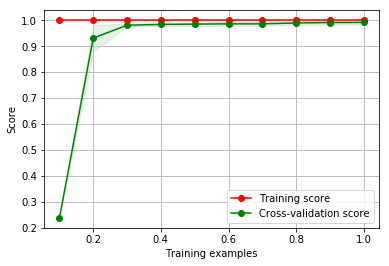

In [96]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)
train_sizes = np.linspace(.1,1.0,10)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()
plt.legend(loc="best")
plt.show()

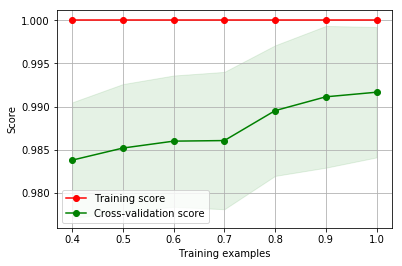

In [94]:
train_scores_mean = np.mean(train_scores, axis=1)[3:] # 0.4 on
train_scores_std = np.std(train_scores, axis=1)[3:]
test_scores_mean = np.mean(valid_scores, axis=1)[3:]
test_scores_std = np.std(valid_scores, axis=1)[3:]
train_sizes = np.linspace(.1,1.0,10)[3:]

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()
plt.legend(loc="best")
plt.show()

In [14]:
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = hr.drop(['left'],1)
y = hr.left 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    
clf.fit(X_train, y_train)
print(X.columns)
clf.feature_importances_
# Drop all lower than 0.01 relevance

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary', 'is_4', 'avg_per_team'],
      dtype='object')


array([ 0.32805276,  0.11853322,  0.18245216,  0.14757901,  0.186516  ,
        0.00783057,  0.00129782,  0.00892283,  0.00954625,  0.00080433,
        0.00846506])

In [39]:
# Dropping all with <0.01 relevance seems to not affect score much (.9920->.9916)
drop = ['left', 'promotion_last_5years', 'Work_accident', 'sales', 'salary']
for i, clf in enumerate(classifiers):
    print('Classifier ', i)
    
    cross_val_left(hr, clf, drop=drop)

Classifier  0
Cross val score:  0.99450795097
[ 0.99989599  0.98623671  0.98705094  0.99963132  0.99972479]

Classifier  1
Cross val score:  0.994485333896
[ 0.99990578  0.98579436  0.98744887  0.99962519  0.99965246]



In [16]:
hr.corr()["left"]

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
sales                    0.032105
salary                  -0.001294
is_4                    -0.046035
Name: left, dtype: float64

In [40]:
# Drop everything with corr to left of < 0.005
# Makes it worse
drop = ['left',  'sales', 'salary']
classifiers = [RandomForestClassifier(n_estimators=500 ,n_jobs=-1), RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1)]#, svm.SVC()]#xgb.XGBClassifier(n_estimators=500, nthread=-1)]# svm.SVC()]

for i, clf in enumerate(classifiers):
    print('Classifier ', i)
    
    cross_val_left(hr, clf, drop=drop)

Classifier  0
Cross val score:  0.994111289948
[ 0.99968583  0.98524786  0.98646125  0.99962488  0.99953662]

Classifier  1
Cross val score:  0.994280805443
[ 0.99987427  0.98537989  0.98719829  0.99943763  0.99951394]



In [18]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators=500, n_jobs=-1)
clf = RFE(model,7 )

X = hr.drop(['left'],1)
y = hr.left 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    
clf.fit(X_train, y_train)
print(clf.support_)
print(clf.ranking_)
# Gets same result as feature_importance, which makes sense

[ True  True  True  True  True False False  True  True False False]
[1 1 1 1 1 3 4 1 1 5 2]


In [19]:
# from sklearn.feature_selection import RFE
# model = svm.SVC(kernel='linear')
# clf = RFE(model,5 )

# X = hr.drop(['left'],1)
# y = hr.left 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    
# clf.fit(X_train, y_train)
# print(clf.support_)
# print(clf.ranking_)
# # Gets same result as feature_importance

In [20]:
# PCA on relevant features
drop = ['left',  'sales', 'salary']

y = np.array(hr.left)

X = np.array(hr.drop(drop,1))
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

In [21]:
print(pca.components_)

[[ -1.00023272e-04   1.16454622e-03   1.03016962e-02   9.99939260e-01
    3.73903656e-03  -7.14279268e-05  -1.02210886e-05   3.40923099e-06
   -1.97930557e-06]
 [ -2.15441037e-02   1.53800123e-02   2.72326123e-01  -6.42153324e-03
    9.61671473e-01   7.51616199e-04   6.30737234e-03   1.55475088e-02
    1.56786116e-03]]


In [22]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[  9.98549061e-01   8.69441180e-04]
0.999418502162


In [23]:
# Still get good accuracy, ~97%
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
y = np.array(hr.left) 

scores = cross_val_score(clf, X_pca, y, cv=CV_FOLDS, n_jobs=-1)
    
    
    
print('Cross val score: ', sum(scores) / CV_FOLDS )
print(scores)

Cross val score:  0.971332998837
[ 0.97634122  0.953       0.956       0.98466155  0.98666222]


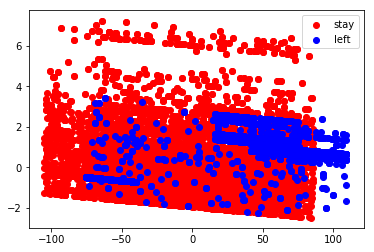

In [24]:
colors = cycle('rb')
target_ids = range(2)
plt.figure()
for i, c, label in zip(target_ids, colors, ["stay","left"]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=c, label=label)
plt.legend()
plt.show()

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


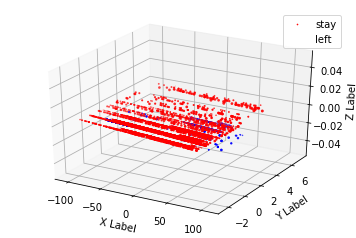

In [25]:
# 3D PCA, Clear plane difference between them
drop = ['left',  'sales', 'salary']

y = np.array(hr.left)

X = np.array(hr.drop(drop,1))
pca = PCA(n_components=3).fit(X)
X_pca = pca.transform(X)

colors = cycle('rb')
target_ids = range(2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, c, label in zip(target_ids, colors, ["stay","left"]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],X_pca[y == i, 2],
                c=c, label=label)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
    
plt.legend()
plt.show()

In [26]:
# 3D accuracy is the same as 2D
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
y = hr.left 

scores = cross_val_score(clf, X_pca, y, cv=CV_FOLDS, n_jobs=-1)
    
    
    
print('Cross val score: ', sum(scores) / CV_FOLDS )
print(scores)

Cross val score:  0.970999798837
[ 0.97534155  0.95033333  0.957       0.98366122  0.98866289]


In [27]:
# Attempt to find department level features, doesn't seem to matter
hr_corr = hr.corr()
hr_corr["sales"]

satisfaction_level       0.003153
last_evaluation          0.007772
number_project           0.009268
average_montly_hours     0.003913
time_spend_company      -0.018010
Work_accident            0.003425
left                     0.032105
promotion_last_5years   -0.027336
sales                    1.000000
salary                   0.000685
is_4                    -0.136533
Name: sales, dtype: float64

In [28]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'sales', 'salary', 'is_4',
       'avg_per_team'], dtype=object)

In [29]:
for col in hr.columns:
    depProperties = hr.groupby('sales').agg({col:[np.size,np.mean]})
    print(depProperties)

      satisfaction_level          
                    size      mean
sales                             
0                 1227.0  0.618142
1                  787.0  0.619822
2                  767.0  0.582151
3                  739.0  0.598809
4                  630.0  0.621349
5                  858.0  0.618601
6                  902.0  0.619634
7                 4140.0  0.614447
8                 2229.0  0.618300
9                 2720.0  0.607897
      last_evaluation          
                 size      mean
sales                          
0              1227.0  0.716830
1               787.0  0.712122
2               767.0  0.717718
3               739.0  0.708850
4               630.0  0.724000
5               858.0  0.715886
6               902.0  0.714756
7              4140.0  0.709717
8              2229.0  0.723109
9              2720.0  0.721099
      number_project          
                size      mean
sales                         
0               1227  3.816626
1    

DataError: No numeric types to aggregate

In [44]:
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = hr.drop(drop,1)
y = hr.left 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

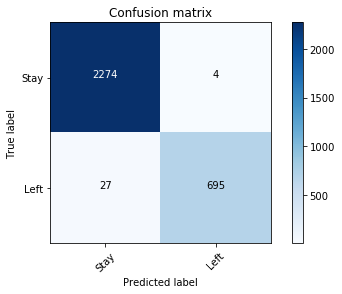

In [51]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=10)

class_names = ["Stay","Left"]

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')


plt.show()

In [55]:
print(classification_report(y_test,y_pred, target_names=class_names))

             precision    recall  f1-score   support

       Stay       0.99      1.00      0.99      2278
       Left       0.99      0.96      0.98       722

avg / total       0.99      0.99      0.99      3000

